# Проект по аналитике в авиакомпании
Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. 


### Описание данных об авиаперевозках
- city — город;
- model — модель самолета;
- flights_amount — количество рейсов для каждой модели самолета в сентябре 2018 года;
- average_flights — среднее количество рейсов, прибывающих в город за день в августе 2018 года.

### План работы
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

### Анализ входных данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", rc={'figure.figsize':(18,5)})

In [3]:
models = pd.read_csv('query_1.csv')
models = models.sort_values(by='flights_amount', ascending=False).reset_index(drop=True)
models

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


In [5]:
flights = pd.read_csv('query_3.csv')
flights = flights.sort_values(by='average_flights', ascending=False).reset_index(drop=True)
flights.head(10)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


####  Выводы:
- типы данных соответствуют содержимому;
- пропусков и дубикатов нет.

In [6]:
def quick_barplot(x, y):
    """строит barplot для указанных Series"""
    ax = sns.barplot(x, y)
    plt.xticks(fontsize=12, rotation=90)
    plt.xlabel(xlabel=x.name, fontsize=20)
    plt.ylabel(ylabel=y.name, fontsize=20)
    plt.show
    return(ax)

# памятка для себя https://towardsdatascience.com/creating-custom-plotting-functions-with-matplotlib-1f4b8eba6aa1

### Распределение количества рейсов по моделям самолета

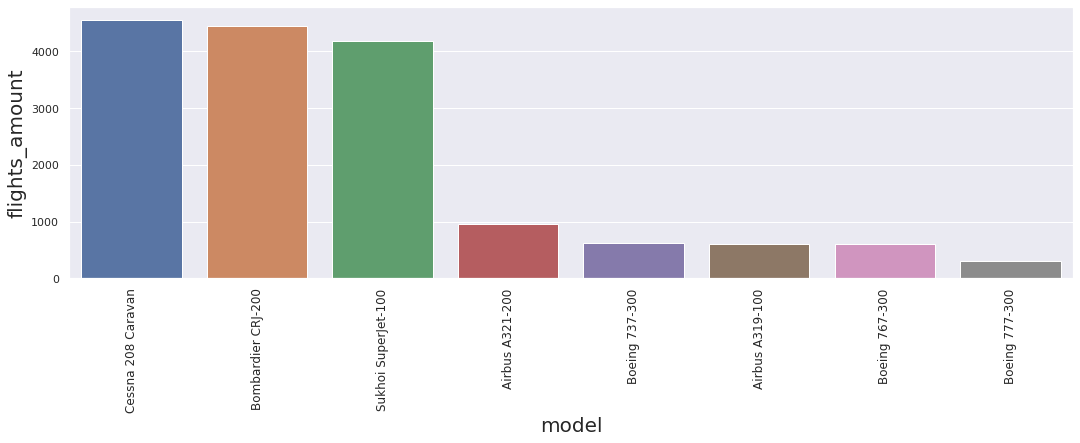

In [8]:
quick_barplot(models['model'], models['flights_amount'])

#### Наиболее часто в сентябре 2018 года летали самолеты Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100. Возможно это связно с тем, что эти типы самолетов являются региональными и поэтому на нах количество совершенных рейсов больше.

### Распределение городов по среднему количеству рейсов в день

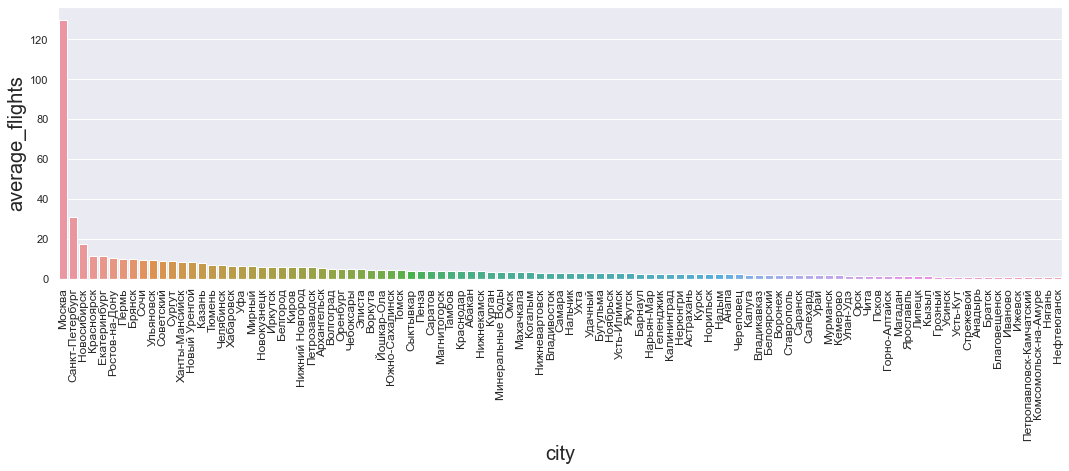

In [7]:
quick_barplot(flights['city'], flights['average_flights'])
plt.show()

#### По среднему количеству рейсов в день ожидаемо выделяются крупные города Москва, СПб, Новосибирск и другие. В них эта величина значительно превышает медианное свое значение в 3 рейса в день.

### ТОП 10 городов по среднему количеству рейсов в день

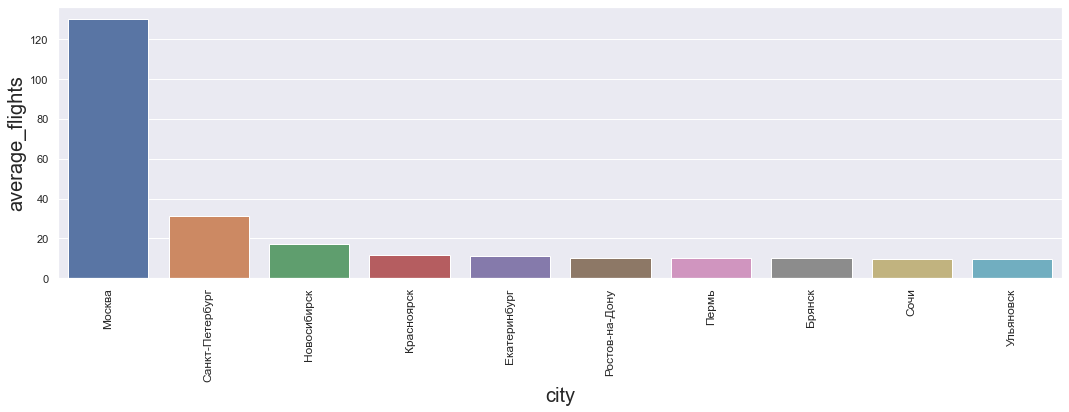

In [8]:
top10_flights = flights.head(10)
quick_barplot(top10_flights['city'], top10_flights['average_flights'])
plt.show()

#### Из ТОП10 городов по среднему количеству рейсов в день особенно выделяется Москва, т.к. в этом городе три международных аэропорта, а также много вспомогательных аэропортов, подходящих для небольших самолетов типа Cessna 208 Caravan.